In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
import operator
import pickle

In [3]:
# load the dataset
filename = 'model/linear_regression_coal_TempOnly.sav'

file = 'data_for_regression.csv'
dataframe = pd.read_csv(file)
dataframe

,Coal,gas,Total_source,Total_source_corrected_population,Av Temp,Max Temp,Min Temp
0,8002.784,147019.775,157606.382,0.007408,43.9,54.3,33.5
1,7220.569,126392.659,134099.440,0.006293,51.9,63.5,40.4
2,7610.386,144803.647,152671.703,0.007153,53.3,64.0,42.6
3,6900.272,155112.540,162152.715,0.007584,67.8,79.9,55.6
4,8163.586,174142.911,182372.032,0.008516,74.1,86.4,61.8
5,8515.072,192696.004,201243.722,0.009382,80.9,93.2,68.5
6,9325.170,236109.652,245462.592,0.011425,85.1,97.4,72.7
7,9099.212,237944.547,247078.403,0.011481,82.8,94.7,70.9
8,8250.066,181522.560,189790.241,0.008805,74.9,86.6,63.1
9,6828.589,163557.882,170422.254,0.007893,65.4,79.1,51.7


### Deep-learning code

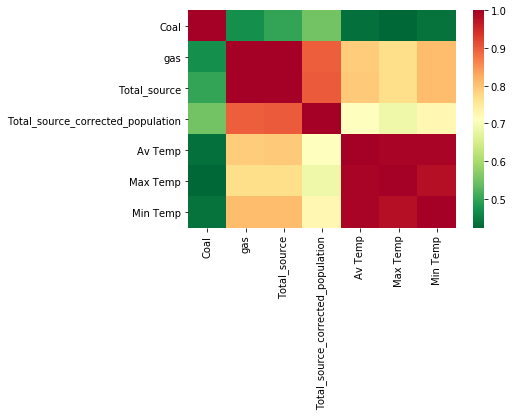

In [4]:

import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = dataframe.corr()

cmap = 'RdYlGn_r'

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           cmap= cmap)

In [5]:
dataframe = dataframe.drop(['Total_source', 'Total_source_corrected_population', 'Max Temp','Min Temp', 'gas'], axis =1)

In [6]:
X = dataframe.drop("Coal", axis=1)
y = dataframe["Coal"]
print(X.shape, y.shape)

(217, 1) (217,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

958.1615607084758
0.44592808624308056


In [9]:
poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)
  # fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
  # predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

  # predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

In [11]:
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 984.3650815559203
R2 score of training set is 0.42847265427635106


The model performance for the test set
-------------------------------------------
RMSE of test set is 898.5036667008361
R2 score of test set is 0.48492607248234276


In [12]:
# save the model to disk

pickle.dump(poly_model, open(filename, 'wb'))

In [13]:
# printing values
print('Slope:' ,poly_model.coef_)
print()
print('Intercept:', poly_model.intercept_)
print()
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [   0.         -560.44972015    4.60925502]

Intercept: 24265.821979852877

Root mean squared error:  958.1615607084758
R2 score:  0.44592808624308056


### Figure

Text(0, 0.5, 'Coal consumption')

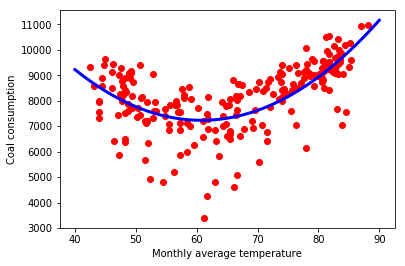

In [16]:
x_plot = np.linspace(40, 90, 51)
x_plot = x_plot.reshape(-1, 1)
y_plot = poly_model.predict(poly_features.fit_transform(x_plot))

plt.figure()
plt.scatter(X, y, color='red')
plt.plot(x_plot, y_plot, color='blue', linewidth=3)
plt.xlabel('Monthly average temperature')
plt.ylabel('Coal consumption')